<a href="https://colab.research.google.com/github/yaiza612/scalable_classification_x_ray_data/blob/main/project_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHORS: YAIZA ARNÁIZ ALCÁCER, PABLO IGNACIO MARCOS LÓPEZ, LEXANE LOUIS






# Definition of the environment

**INITALIZATION OF SPARK AND IMPORTATION OF THE LIBRARIES**

In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [ ]:
import sys

# Set current python version
python_version = f"3.7.10"

In [ ]:
# Install Miniconda
!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local

# Update Conda
!conda install --channel defaults conda python=$python_version --yes
!conda update --channel defaults --all --yes

# Append to the sys.path
_ = (sys.path
        .append(f"/usr/local/lib/python3.7/site-packages"))

os.environ['PYTHONHOME']="/usr/local"



--2022-02-04 11:15:22--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-02-04 11:15:22--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   190MB/s    in 0.3s    

2022-02-04 11:15:23 (190 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_

In [ ]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca


     |████████████████████████████████| 23.6 MB 1.4 MB/s 
     |████████████████████████████████| 35.4 MB 445 kB/s 
     |████████████████████████████████| 71.0 MB 338 bytes/s 
     |████████████████████████████████| 1.1 MB 48.3 MB/s 
     |████████████████████████████████| 40 kB 4.4 MB/s 
     |████████████████████████████████| 100.7 MB 54 kB/s 
     |████████████████████████████████| 218.4 MB 54 kB/s 
     |████████████████████████████████| 15.7 MB 45.3 MB/s 
     |████████████████████████████████| 197 kB 59.3 MB/s 
     |████████████████████████████████| 98 kB 7.0 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814407 sha256=69576b261f4809d6a352b2367479e2b9302936cd323fb01907d4c203572a0f8f
  Stored in directory: /root/.cache/pip/wheels/f1/42/b0/ba397759613f4feb1611021a2503e60e344e546671b2ae04f8
Successfully built pyspark


In [ ]:
# Install python dependencies
!pip install torch==1.7.1 torchvision==0.8.2
!pip install six cloudpickle
!pip install jep==3.9.0

     |████████████████████████████████| 776.8 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 26.1 MB/s 
     |████████████████████████████████| 4.3 MB 49.6 MB/s 
     |████████████████████████████████| 3.0 MB 5.1 MB/s 
  Created wheel for jep: filename=jep-3.9.0-cp37-cp37m-linux_x86_64.whl size=1065636 sha256=e62b565f8ffba8a546f392cc170a8c4fe66f1fd90723e813d2c4fc496d55e81e
  Stored in directory: /root/.cache/pip/wheels/f9/7b/94/1add2c76c89ee9815eabc55d94a7b0cfc517c652bb90cb4a57
Successfully built jep


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **PNEUMONIA IDENTIFICATION FROM X-RAY IMAGES**

AUTHORS: Yaiza Arnáiz Alcácer, put here your names

The aim of our code is classify chest ray images to provide a diagnosis of bacterial pneumonia o viral pneumonia. 
The interpretation of the X-ray images it is a bottleneck in the hospitals, and different classificators for these type of images are needed.
 

## 1.  INTRODUCTION TO PNEUMONIA


Pneumonia is an infection of the air sacs in one (unilateral) or both the lungs (bilateral). Characterized by severe cough with phlegm, fever, chills and difficulty in breathing.

This infection can be bacterial, viral (including COVID-19) or fungal and causes the alveoli to fill up with fluid or pus. 

**Symptoms**

The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

Signs and symptoms of pneumonia may include:

* Chest pain when you breathe or cough
* Confusion or changes in mental awareness (in adults age 65 and older)
* Cough, which may produce phlegm
* Fatigue
* Fever, sweating and shaking chills
* Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
* Nausea, vomiting or diarrhea
* Shortness of breath

Newborns and infants may not show any sign of the infection. Or they may vomit, have a fever and cough, appear restless or tired and without energy, or have difficulty breathing and eating.

**Risk Factors**

* Childrem under 2 years old or younger
* People who are age 65 or older
* Being hospitalized, specially if you are connected to a ventilator
* Smocking
* Chronic disease such as asthma or heart disease
* Weakened or suppresed immune system 

**Diagnosis** 

* Blood test to confirm an infection and try to identify the type of organism that caused pneumonia. 

* Chest X-ray to determine the extent and location of the infection

* Pulse oximetry to measure the oxygen level in your blood. 

* Sputum test to get a sample of fluid from your lungs. 

In case of a more serious condition, it is possible realize as wel CT scan or pleural fluid culture. 


**Treatment**

* Antibiotics to treat bacterial pneumonia. 
* Cough medicine
* Fever reducers


## 2. CURRENT STATE OF THE ART FOR CLASSIFICATION OF X_RAY IMAGES

During the current pandemy of COVID-19 these Deep Learning models of X-ray images were research intensively to find a model with enough accuracy, recall and precision for the detection of COVID-19 using Chest X-ray without human supervision.

The reason is that due to the over-increasing number of cases of COVID-19 infection, it is becoming more difficult for radiologists to keep up with this demand. As it was mention before, the diagnostic of Pneumonia by X-ray is the bottleneck of a lot of hospitals, and in the current situation it is needed more than ever a solution for this problem. 

Therefore, we could find out in the literature a model with a recall, accuracy and precision superior to 99% for Chest X-ray classification: https://doi.org/10.1016/j.asoc.2020.106859

The model they use is InstaCovNet-19, which is an stacked model that use Iception, NASnet, Xception, MobileNetV2 and ResNet, all of then models of image classification. 

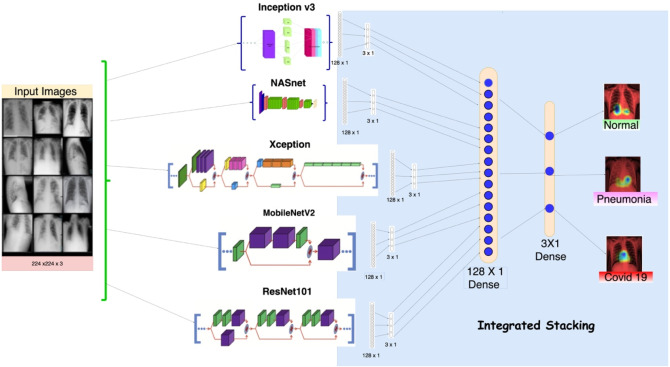



**We would like to consider as well the tranferlearning to try out this model (InstaCovNet-19) but the code it is not available. 
But since the paper introduce the idea of improve the X-chest ray image classification by integration stacking of neural networks already known as good models, we will explore it by designing our own model in Spark with integrated stacking.**

## 3. DATASET DESCRIPTION

The dataset can be found her: https://data.mendeley.com/datasets/rscbjbr9sj/2?__hstc=25856994.9a09a91357a104706292fa960434cfb0.1643116296328.1643116296328.1643116296328.1&__hssc=25856994.1.1643116296328&__hsfp=4215451866

It is used in this paper: https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5 to be classified by using ImageNet. 

The dataset is organized ito 3 folders: Train, test and validation.
It contains subfolders of each image category: Pneumonia and normal. 

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

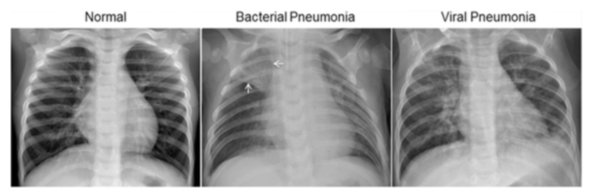

In [ ]:
#!unzip /content/drive/MyDrive/Colab_Notebooks/archive.zip -d /content/drive/MyDrive/Colab_Notebooks/

In [ ]:
# Define the path to the different folders:

test_path = '/content/drive/MyDrive/Colab_Notebooks/chest_xray/test'
train_path = '/content/drive/MyDrive/Colab_Notebooks/chest_xray/train'
validation_path = '/content/drive/MyDrive/Colab_Notebooks/chest_xray/val'

## 4. DATA PRE-PROCESSING

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.models as models
import torchvision.transforms as T


We want to realize the following preprocessing: 

* CenterCrop - resizes the image to 224 x 224 
* RandomFlip - Randomly flips 50% of the image horizontally 
* ColorJitter- Randomly adjust the brigthness of 50% of the images
* Normalize - Normalize the images 


In [ ]:
def custom_transform(sample):
  transformer = torchvision.transforms.Compose([T.CenterCrop(size=(299, 299)), T.ToTensor(), T.RandomHorizontalFlip(p=0.5), 
                                  T.ColorJitter(brightness=0.5, hue=0), 
                                  T.Normalize((0.5,), (0.5,)),])
  return transformer(sample["image"]), sample["label"]

We create the datasets:

In [ ]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
#from skimage import io

class CustomDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        normal_names = ["NORMAL/" + f for f in listdir(join(root_dir, "NORMAL")) if isfile(join(root_dir, "NORMAL", f))]
        labels_normal = [0]*len(normal_names)
        pneumonia_names = ["PNEUMONIA/" + f for f in listdir(join(root_dir, "PNEUMONIA")) if isfile(join(root_dir, "PNEUMONIA", f))]
        labels_pneumonia = [1]*len(pneumonia_names)
        self.labels = labels_normal
        self.labels.extend(labels_pneumonia)
        self.labels = np.asarray(self.labels, dtype=np.float32)
        # labelling done

        self.filenames = normal_names
        self.filenames.extend(pneumonia_names)

        

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.filenames[idx])
        image = Image.open(img_name).convert("RGB")
        #print(image.shape)
        label = torch.Tensor([self.labels[idx]])
        sample = {"image": image, "label": label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
train_data = CustomDataset(train_path, transform=custom_transform)
val_data = CustomDataset(validation_path, transform=custom_transform)
test_data = CustomDataset(test_path, transform=custom_transform)



FileNotFoundError: ignored

We load the data:

In [ ]:
import torchvision
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
# Check number of images 
print('Number of images for training: ', len(train_data))
print('Number of images for testing: ', len(test_data))
print('Number of images for validation: ', len(val_data))

## 5. NEURAL NETWORK ESTRUCTURE

### INTEGRATED STACKING NETWORK

In [ ]:
# import necesary libraries and modules
from __future__ import print_function
import os
import argparse

from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

In [ ]:
# recommended to set it to True when running BigDL in Jupyter notebook. 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":
    init_orca_context(cores=3, memory="8g") # run in local mode
elif cluster_mode == "k8s":
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=4) # run on K8s cluster
elif cluster_mode == "yarn":
    init_orca_context(
        cluster_mode="yarn-client", cores=4, num_nodes=2, memory="2g",
        driver_memory="10g", driver_cores=1,
        conf={"spark.rpc.message.maxSize": "1024",
              "spark.task.maxFailures": "1",
              "spark.driver.extraJavaOptions": "-Dbigdl.failure.retryTimes=1"}) # run on Hadoop YARN cluster

In [ ]:
# check that stacking works as expected
a = torch.rand(size=(8, 32))
b = torch.rand(size=(8, 32))
c = torch.rand(size=(8, 32))
print(a.shape)
d = torch.cat((a, b, c), axis=-1)
print(d.shape)

At the end the stacking of the 5 neural networks because a problem of the memory ram (12 gb in google collab free) and the resources of the paper are bigger than the one we have. 
It is just not possible define the same neural network they did because the session crush due to the limit of the ram, but we define the code and check that the network works anyways: 

```
# Define the network
class IntegratedNet(nn.Module):
  def __init__(self):
    super(IntegratedNet, self).__init__()

    self.resnet18 = models.resnet18(pretrained=True)
    self.resnet18.fc = nn.Linear(512, 32)

    self.densenet = models.densenet161(pretrained=True)
    self.densenet.classifier = nn.Linear(2208, 32)

    self.inception = models.inception_v3(pretrained=True)
    self.inception.fc = nn.Linear(2048, 32)
    
    self.mnasnet = models.mnasnet1_0(pretrained=True)
    self.mnasnet.classifier = nn.Sequential(nn.Dropout(0.2, inplace=True),
                                            nn.Linear(1280, 32))

    self.mobilenet_v2 = models.mobilenet_v2(pretrained=True)
    self.mobilenet_v2.classifier = nn.Sequential(nn.Dropout(0.2), nn.Linear(1280, 32))
    

    self.fc_out = nn.Linear(2*32, 1)  # for binary classification, use single output

  def forward(self, x):
    x_res = self.resnet18(x)
    x_dense = self.densenet(x.detach())
    x_inception = self.inception(x)[0]
    x_mnas = self.mnasnet(x)
    x_mobilenet = self.mobilenet_v2(x)
    
    #Concatenate the outputs
    x = torch.cat((x_res, x_dense, x_inception, x_mnas, x_mobilenet), axis=-1)
    x = self.fc_out(x)
    return x



```
But with the actual resources we cannot use it, we define therefore another 
neural network stacking two models instead. Which is what google collab can handle. 

In [ ]:
# Define the network
class IntegratedNet(nn.Module):
  def __init__(self):
    super(IntegratedNet, self).__init__()

    self.resnet18 = models.resnet18(pretrained=True)
    self.resnet18.fc = nn.Linear(512, 32)

    #self.densenet = models.densenet161(pretrained=True)
    #self.densenet.classifier = nn.Linear(2208, 32)

    #self.inception = models.inception_v3(pretrained=True)
    #self.inception.fc = nn.Linear(2048, 32)
    
    self.mnasnet = models.mnasnet1_0(pretrained=True)
    self.mnasnet.classifier = nn.Sequential(nn.Dropout(0.2, inplace=True),
                                            nn.Linear(1280, 32))

    #self.mobilenet_v2 = models.mobilenet_v2(pretrained=True)
    #self.mobilenet_v2.classifier = nn.Sequential(nn.Dropout(0.2), nn.Linear(1280, 32))
    

    self.fc_out = nn.Linear(2*32, 1)  # for binary classification, use single output

  def forward(self, x):
    x_res = self.resnet18(x)
    #x_dense = self.densenet(x.detach())
    #x_inception = self.inception(x)[0]
    x_mnas = self.mnasnet(x)
    #x_mobilenet = self.mobilenet_v2(x)
    #x_mobilenet = self.mobilenet_v2(x.detach())
    
    #Concatenate the outputs
    #x = torch.cat((x_res, x_dense, x_inception, x_mnas, x_mobilenet), axis=-1)
    x = torch.cat((x_res, x_mnas), axis=-1)
    x = self.fc_out(x)
    return x

In [ ]:
net = IntegratedNet()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [ ]:
# training loss vs. epochs
criterion = nn.BCEWithLogitsLoss()
batch_size = 32
epochs = 1

In [ ]:
# we are still writing code# still there

In [ ]:
from bigdl.orca.learn.pytorch import Estimator # don't stop, google
from bigdl.orca.learn.metrics import Accuracy # please dont strop we are still here

est = Estimator.from_torch(model=net, optimizer=optimizer, loss=criterion, metrics=[Accuracy()])

In [ ]:
from bigdl.orca.learn.trigger import EveryEpoch 

est.fit(data=train_loader, epochs=1, validation_data=test_loader,
        checkpoint_trigger=EveryEpoch())

In [ ]:
result = est.evaluate(data=test_loader)
for r in result:
    print(r, ":", result[r])

In [ ]:
# stop orca context when program finishes
stop_orca_context()

## 6. VALIDATION OF THE MODEL

Here do the visualization of the loss, accuracy, visualize the model graph, the roc curve, the histograms and the confussion matrix.

## 7. CONCLUSION

## 8. REFERENCES

HERE PUT WITH CORRECT APA THE CITATIONS OF THE INTRODUCTION